In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    'figure.facecolor': '#111111',
    'axes.facecolor': '#111111',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'grid.color': '#444444',
    'grid.linestyle': '--',
    'grid.alpha': 0.5,
})

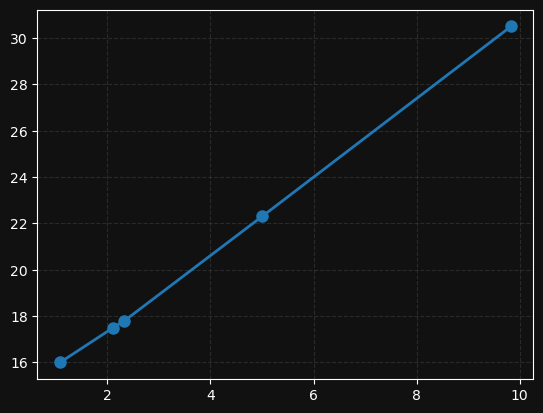

In [12]:
from LeastSquare import LeastSquareRegression
model = LeastSquareRegression()
import numpy as np
m = np.array([1.08, 2.11, 2.33, 5.00, 9.83], dtype=np.float64)
Lm = np.array([16, 17.5, 17.8, 22.3, 30.5], dtype=np.float64)
plt.plot(m, Lm, marker='o', markersize=8, linestyle='-', linewidth=2)
plt.grid(True)
plt.show()

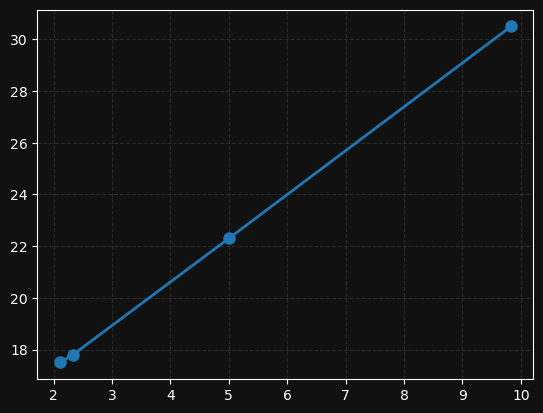

In [7]:
m = np.array([ 2.11, 2.33, 5.00, 9.83], dtype=np.float64)
Lm = np.array([ 17.5, 17.8, 22.3, 30.5], dtype=np.float64)
plt.plot(m, Lm, marker='o', markersize=8, linestyle='-', linewidth=2)
plt.grid(True)
plt.show()

In [13]:
L0 = 12.4
y = 10 * (Lm - L0)
x = m
def f(x):
    return x
def g(y):
    return y
def dfdx(x):
    return 1
def dgdy(y):
    return 1
results = model.fit(x, y, f, g, dfdx, dgdy, 0.01, 0.1)

In [14]:
print(results)

{'a': 21.392401105433297, 'b': -14.335362495567546, 'sigma_a': 0.005960769186178764, 'sigma_b': 0.06865923831262624}


In [15]:
g = 9.81
k = g/results['a']
sigma_k = g * results['sigma_a'] / (results['a']** 2)
print(k, sigma_k)

0.4585740493388763 0.00012777687036665295


In [16]:
mcs = results['b'] * k / g
sigma_mcs = results['b'] * results['sigma_a'] / (results['a'] ** 2) + results['sigma_b'] / results['a']
print(mcs, sigma_mcs)

-0.6701147021746248 0.0030227948198051804


In [17]:
m = np.array([2.11, 2.33, 5.00, 9.83, 19.78], dtype=np.float64)
T = np.array([5.765, 5.905, 7.610, 9.565, 12.705], dtype=np.float64)
def p(x):
    return x
def dpdx(x):
    return 1
def q(y):
    return y**2
def dqdy(y):
    return 2*y
model2 = LeastSquareRegression()
results2 = model2.fit(m, T, p, q, dpdx, dqdy, 0.01, 0.005)

In [18]:
print(results2)

{'a': 7.319465582769457, 'b': 18.579877973396233, 'sigma_a': 0.00696713885444354, 'sigma_b': 0.04678792769817185}


In [19]:
from math import pi
k1 = 2 * pi * pi / (5 * results2['a'])
sigma_k1 = 2 * pi * pi * results2['sigma_a']/(5 * (results2['a']**2))
msd = results2['b']/results2['a']
sigma_msd = (results2['a'] * results2['sigma_b'] + results2['b'] * results2['sigma_a']) / ((results2['a'])** 2)
print(k1, sigma_k1)
print(msd, sigma_msd)

0.5393620225128518 0.0005133995181979806
2.5384200203269742 0.00880849178421774


In [20]:
f = np.array([8.79, 14.47, 18.27], dtype=np.float64)
n = np.array([2, 3, 4], dtype=np.float64)
model3 = LeastSquareRegression()
def p1(x):
    return x
def q1(y):
    return y
def dp1dx(x):
    return 1
def dq1dy(y):
    return 1

results3 = model3.fit(n, f, p1, q1, dp1dx, dq1dy, 0, 0.01)
f0 = results3['a']
sigma_f0 = results3['sigma_a']
print(f0, sigma_f0)

4.609615384615385 0.0013867504905630728
